<a href="https://colab.research.google.com/github/Nakamura-ta-hub/M5SeriesRobot_Book/blob/main/3_4_resnet_ipynb_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
]from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# パッケージのインポート
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Activation, Add, BatchNormalization, Conv2D, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
#入力データの整理
Train_images = []
Train_labels = [0,0,0,1,1,2,2,2,2,2,2,2,2,4,4,3,2,2,2,0,0,1,2,2,2,2,1,1,2,2,1,2,2,2,2,2,2,2,2,3,2,2,2,2,2,0,0,1,1,2,2,2,4,4,4,3,2,2,2,1,2,2,2,2,2,2,4,4,2,2,0,0,2,2,2,2,4,3,3,2,2,2,0,1,2,2,2,1,2,2,2,2,2,0,0,0,2,2,2,2,2,2,4,4,3,2,2,2,2,2,2,2,2,2,4,4,2,2,4,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,4,4,4,3,2,2,2,2,2,2,2,2,0,0,1,2,2,2,2,2,4,4,4,2,2,2,2,0,0,0,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,0,0,1,2,2,2,2,2,2,4,4,4,4,4,2,2,2,2,2,2,2,2,2,2,2,3,3,2,2,2,1,1,2,1,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,3,2,2,2,2,2,2,2,0,0,1,1,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,0,0,2,2,1,2,2,2,2,0,0,0,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,4,3,3,2,2,2,2,4,4,3,2,2,2,0,0,1,2,2,1,2,2,1,2,2,2,2,2,2,2,4,4,4,3,3,3,2,2,2,2,2,2,2,1,2,2,2,2,2,3,2,2,2,0,0,1,2,2,2,2,2,2,2,2,2,2,4,4,4,3,2,2,0,0,0,0,1,2,2,2,2,2,2,1,2,2,2,2,4,4,4,3,2,2,2,2,3,2,2,2,2,2,2,2,2,2,0,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,4,4,4,2,2,2,2,0,0,0,0,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,0,1,1,2,2,2,2,2,4,4,4,3,2,2,2,2,2,1,1,2,1,1,2,2,2,2,2,2,2,4,4,3,2,2,2,2,1,2,2,2,2,2,2,2,2,2,4,4,3,2,2,2,2,2,2,2,2,0,0,0,0,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,4,4,4,3,3,2,2,2,2,2,2,2,2,2,0,0,0,1,2,2,2,2,2,4,4,4,2,2,2,2,2,2,2,3,3,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,4,4,3,3,2,2,2,2,2,2,4,4,4,4,3,3,2,2,2,2,2,0,0,0,0,1,2,2,2,2,2,2,2,3,2,2,2,2,2,0,0,1,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,0,0,0,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,4,4,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,2,2,2,2,0,0,0,2,2,2,1,2,2,2,2,4,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,1,2,2,1,2,2,1,2,2,2,2,2,2,3,2,2,2,2,2,1,2,2,2,2,2,3,2,2,2,2,1,2,2,2,2,3,2,2,2,2,2,4,4,4,3,2,2,2,2,2,2,2,0,0,0,1,2,2,2,2,2,2,2,4,2,2,2,2,2,3,2,2,2,2,2,1,2,2,2,2,2,0,0,0,0,1,2,2,2,1,2,2,2,1,2,2,2,2,2,3,2,2,2,1,2,2,2,2,3,2,2,2,2,4,4,3,3,2,2,0,1,1,2,2,2,2,2,0,0,0,0,1,2,2,2,1,2,2,4,3,3,2,2,2,0,1,1,1,2,2,2,2,2,1,2,2,2,3,2,2,2,2,2,2,4,4,3,3,2,2,2,2,2,2,0,0,0,0,1,2,2,2,1,2,2,2,2,3,2,2,2,2,1,2,2,2,1,1,1,2,2,2,2,1,2,3,2,0,0,0,0,0,1,2,2,2,2,2,2,2,4,4,4,3,3,2,2,2,2,2,2,0,0,1,2,2,2,2,4,4,2,2,2,2,0,1,1,2,2,2,2,2,2,2,2,2,0,0,0,0,2,2,2,1,2,2,2,2,2,2,2,3,3,3,3,3,2,2,2,1,2,2,2,2,2,3,2,2,2,2,0,0,0,1,2,2,2,2,2,4,4,4,3,3,2,2,2,2,2,1,2,2,2,4,4,2,2,3,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,0,0,0,1,1,2,2,2,1,2,2,2,4,4,4,3,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,4,4,4,2,2,4,4,2,2,2,2,2,0,0,0,2,2,2,2,1,2,2,2,3,3,2,2,2,1,2,2,2,2,3,2,2,2,2,2,2,1,1,2,2,2,3,3,3,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,0,0,0,1,1,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,3,2,2,2,0,0,2,2,2,2,4,4,3,2,2,2,2,2,1,2,2,1,2,2,3,2,2,2,3,2,2,2,2,0,0,0,0,0,2,2,2,2,4,2,2,3,2,2,2,2,2,0,1,2,2,2,2,2,1,2,2,2,3,2,2,1,2,2,2,2,2,2,3,2,2,2,2,2,2,4,4,3,2,2,3,2,2,2,2,0,1,2,2,2,2,1,2,2,1,2,2,2,2,2,3,2,2,2,2,4,4,3,2,2,2,0,0,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,4,4,4,4,1,2,2,2,2,2,1,2,2,2,3,2,2,2,2,2,2,2,2,0,0,2,2,4,3,3,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,0,0,1,1,2,2,2,2,1,2,2,2,1,2,2,2,3,2,2,2,2,2,2,2,1,2,2,2,3,2,2,2,2,2,2,2,2,2,2]
Test_images = []
Test_labels = [2,2,2,0,1,2,2,2,2,2,4,3,4,2,2,1,2,2,2,4,1,1,2,2,2,2,2,0,0,0,2,2,1,2,2,2,4,4,3,2,2,2,3,2,2,2,1,2,2,2,0,2,2,2,4,3,3,2,2,3,2,2,2,1,2,2,2,2,2,2,0,0,1,2,1,2,2,2,1,2,2,2,2,2,3,2,2,2,0,0,2,2,4,4,3,2,2,2,2,4,4,4,3,3,3,2,2,1,2,2,2,0,0,0,2,2,1,2,2,3,2,2,4,4,2,2,2,0,0,0,1,1,2,2,2,2,2,4,4,4,3,2,2,2,3,2,2,2,2,1,2,2,3,2,2,2,1,2,2,2,2,2,2,4,4,4,3,2,2,2,1,2,2,2,3,2,2,2,1,1,1,2,2,2,0,1,1,2,2,1,2,2,2,0,0,0,0,2,2,1,2,2,2,4,4,3,3,2,2,2,2,1,2,2,2,3,2,2,2,2,2,2,2,4,4,4,4,4,3,3,2,2,1,2,2,2,2,2,4,4,4,4,2,2,0,1,1,2,1,2,2,2,2,1,2,2,2,2,0,1,1,2,1,2,2,2,1,2,2,2,3,2,2,2,2,4,4,3,2,2,2,0,0,1,1,2,1,2,2,2,2,2,2,4,4,4,4,3,2,2,2,2,2,1,1,2,2,2,3,2,2,2,2,2,0,0,0,0,1,2,2,2,1,2,2,2,3,2,2,2,1,2,2,4,4,4,3,3,2,2,2,2,0,0,1,1,2,2,2,2,2,4,3,3,3,2,2,2,0,0,1,1,1,2,2,2,2,0,0,0,1,2,2,2,4,4,4,3,2,2,2,1,2,2,3,2,2,2,2,2,4,4,4,4,2,2,2,2,4,4,4,4,2,1,2,1,2,2,3,2,2,2,1,1,3,2,2,2,1,2,2,2,0,0,0,1,2,1,2,2,1,2,2,3,2,2,2,2,0,1,1,2,2,1,2,2,1,2,2,2,3,2,2,2,2,2]

Train_dir_name = "/content/drive/My Drive/train"
Test_dir_name = "/content/drive/My Drive/test"
Train_files = os.listdir(Train_dir_name) 
Test_files = os.listdir(Test_dir_name)
for Train_file in Train_files:
    photo = np.array(Image.open(os.path.join(Train_dir_name, Train_file)))
    Train_images.append(photo)
for Test_file in Test_files:
    photo = np.array(Image.open(os.path.join(Test_dir_name, Test_file)))
    Test_images.append(photo)

In [5]:
# データの配列化
Train_images = np.array(Train_images)
Train_labels = np.array(Train_labels)
Test_images = np.array(Test_images)
Test_labels = np.array(Test_labels)
print(Train_images.shape)
print(Train_labels.shape)
print(Test_images.shape)
print(Test_labels.shape)

# データセットの画像の前処理
Train_images = Train_images.astype('float32')/255.0
Test_images = Test_images.astype('float32')/255.0

# データセットの画像の前処理後のシェイプの確認
print(Train_images.shape)
print(Test_images.shape)

# データセットのラベルの前処理
Train_labels = to_categorical(Train_labels, 5)
Test_labels = to_categorical(Test_labels, 5)

# データセットのラベルの前処理後のシェイプの確認
print(Train_labels.shape)
print(Test_labels.shape)

(1387, 60, 120, 3)
(1387,)
(456, 60, 120, 3)
(456,)
(1387, 60, 120, 3)
(456, 60, 120, 3)
(1387, 5)
(456, 5)


In [ ]:
# データセットのシェイプの確認
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


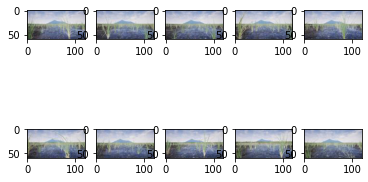

In [6]:
# データセットの画像の確認
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Train_images[i])
plt.show()

In [ ]:
tttgtt# データセットのラベルの確認
print(Train_labels[0:10])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
# データセットの前処理後のシェイプの確認
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [7]:
# 畳み込み層の生成
def conv(filters, kernel_size, strides=1):
    return Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False,
        kernel_initializer='he_normal', kernel_regularizer=l2(0.0001))

In [8]:
# 残差ブロックAの生成
def first_residual_unit(filters, strides):
    def f(x):
        # →BN→ReLU
        x = BatchNormalization()(x)
        b = Activation('relu')(x)

        # 畳み込み層→BN→ReLU
        x = conv(filters // 4, 1, strides)(b)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        # 畳み込み層→BN→ReLU
        x = conv(filters // 4, 3)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        # 畳み込み層→
        x = conv(filters, 1)(x)

        # ショートカットのシェイプサイズを調整
        sc = conv(filters, 1, strides)(b)

        # Add
        return Add()([x, sc])
    return f

In [9]:
# 残差ブロックBの生成
def residual_unit(filters):
    def f(x):
        sc = x
        
        # →BN→ReLU
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        # 畳み込み層→BN→ReLU
        x = conv(filters // 4, 1)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        # 畳み込み層→BN→ReLU
        x = conv(filters // 4, 3)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        # 畳み込み層→
        x = conv(filters, 1)(x)

        # Add
        return Add()([x, sc])
    return f

In [10]:
# 残差ブロックAと残差ブロックB x 17の生成
def residual_block(filters, strides, unit_size):
    def f(x):
        x = first_residual_unit(filters, strides)(x)
        for i in range(unit_size-1):
            x = residual_unit(filters)(x)
        return x
    return f

In [11]:
# 入力データのシェイプ
input = Input(shape=(60,120, 3))

# 畳み込み層
x = conv(16, 3)(input)

# 残差ブロック x 54
x = residual_block(64, 1, 18)(x)
x = residual_block(128, 2, 18)(x)
x = residual_block(256, 2, 18)(x)

# →BN→ReLU
x = BatchNormalization()(x)
x = Activation('relu')(x)

# プーリング層
x = GlobalAveragePooling2D()(x)

# 全結合層
output = Dense(5, activation='softmax', kernel_regularizer=l2(0.0001))(x)

# モデルの作成
model = Model(inputs=input, outputs=output)

In [12]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer=SGD(momentum=0.9), metrics=['acc'])

In [69]:
print(Test_labels)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [13]:
# ImageDataGeneratorの準備
train_gen  = ImageDataGenerator(
    featurewise_center=True, 
    featurewise_std_normalization=True,
    width_shift_range=0.125, 
    height_shift_range=0.125, 
    horizontal_flip=True)
test_gen = ImageDataGenerator(
    featurewise_center=True, 
    featurewise_std_normalization=True)

# データセット全体の統計量を予め計算
for data in (train_gen, test_gen):
    data.fit(Train_images)

In [14]:
# LearningRateSchedulerの準備
def step_decay(epoch):
    x = 0.1
    if epoch >= 80: x = 0.01
    if epoch >= 120: x = 0.001
    return x
lr_decay = LearningRateScheduler(step_decay)

In [15]:
# 学習
batch_size = 60
history = model.fit_generator(
    train_gen.flow(Train_images, Train_labels, batch_size=batch_size),
    epochs=50,
    steps_per_epoch=Train_images.shape[0] // batch_size,
    validation_data=test_gen.flow(Test_images, Test_labels, batch_size=batch_size),
    validation_steps=Test_images.shape[0] // batch_size,
    callbacks=[lr_decay])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
23/23 [==============================] - 41s 938ms/step - loss: 3.8528 - acc: 0.6185 - val_loss: 72159997198336.0000 - val_acc: 0.1167
Epoch 2/50
23/23 [==============================] - 19s 813ms/step - loss: 3.7469 - acc: 0.6731 - val_loss: 7217317376.0000 - val_acc: 0.0881
Epoch 3/50
23/23 [==============================] - 19s 813ms/step - loss: 3.7542 - acc: 0.6736 - val_loss: 5070449.0000 - val_acc: 0.0881
Epoch 4/50
23/23 [==============================] - 19s 817ms/step - loss: 3.7198 - acc: 0.6722 - val_loss: 56111.7109 - val_acc: 0.0833
Epoch 5/50
23/23 [==============================] - 19s 825ms/step - loss: 3.6896 - acc: 0.6753 - val_loss: 3181.3672 - val_acc: 0.0905
Epoch 6/50
23/23 [==============================] - 19s 828ms/step - loss: 3.6673 - acc: 0.6758 - val_loss: 290.2151 - val_acc: 0.0786
Epoch 7/50
23/23 [==============================] - 19s 832ms/step - loss: 3.6469 - acc: 0.6747 - val_loss: 15.6680 - val_acc: 0.1190
Epoch 8/50
23/23 [=============

In [16]:
# モデルの保存
model.save('resnet.h5')

In [81]:
score = model.evaluate(Test_images, Test_labels, verbose=1)
print('loss=',score[0])
print('accuracy=',score[1])

15/15 [==============================] - 2s 109ms/step - loss: 2.9749 - acc: 0.5855
loss= 2.974949598312378
accuracy= 0.5855262875556946


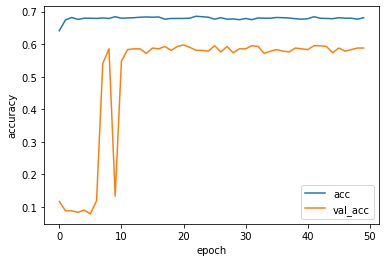

In [17]:
# グラフの表示
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [86]:
import numpy as np
from sklearn.metrics import confusion_matrix

test_labels =[2,2,2,0,1,2,2,2,2,2,4,3,4,2,2,1,2,2,2,4,1,1,2,2,2,2,2,0,0,0,2,2,1,2,2,2,4,4,3,2,2,2,3,2,2,2,1,2,2,2,0,2,2,2,4,3,3,2,2,3,2,2,2,1,2,2,2,2,2,2,0,0,1,2,1,2,2,2,1,2,2,2,2,2,3,2,2,2,0,0,2,2,4,4,3,2,2,2,2,4,4,4,3,3,3,2,2,1,2,2,2,0,0,0,2,2,1,2,2,3,2,2,4,4,2,2,2,0,0,0,1,1,2,2,2,2,2,4,4,4,3,2,2,2,3,2,2,2,2,1,2,2,3,2,2,2,1,2,2,2,2,2,2,4,4,4,3,2,2,2,1,2,2,2,3,2,2,2,1,1,1,2,2,2,0,1,1,2,2,1,2,2,2,0,0,0,0,2,2,1,2,2,2,4,4,3,3,2,2,2,2,1,2,2,2,3,2,2,2,2,2,2,2,4,4,4,4,4,3,3,2,2,1,2,2,2,2,2,4,4,4,4,2,2,0,1,1,2,1,2,2,2,2,1,2,2,2,2,0,1,1,2,1,2,2,2,1,2,2,2,3,2,2,2,2,4,4,3,2,2,2,0,0,1,1,2,1,2,2,2,2,2,2,4,4,4,4,3,2,2,2,2,2,1,1,2,2,2,3,2,2,2,2,2,0,0,0,0,1,2,2,2,1,2,2,2,3,2,2,2,1,2,2,4,4,4,3,3,2,2,2,2,0,0,1,1,2,2,2,2,2,4,3,3,3,2,2,2,0,0,1,1,1,2,2,2,2,0,0,0,1,2,2,2,4,4,4,3,2,2,2,1,2,2,3,2,2,2,2,2,4,4,4,4,2,2,2,2,4,4,4,4,2,1,2,1,2,2,3,2,2,2,1,1,3,2,2,2,1,2,2,2,0,0,0,1,2,1,2,2,1,2,2,3,2,2,2,2,0,1,1,2,2,1,2,2,1,2,2,2,3,2,2,2,2,2]

predict_prob=model.predict(Test_images)
lista =  predict_prob.tolist()
predict_classes=np.argmax(lista,axis=1)

true_classes = test_labels
print(confusion_matrix(true_classes,predict_classes))
print(type(lista))
lista =  predict_prob.tolist()


[[  0   0  39   0   0]
 [  0   0  61   0   0]
 [  0   0 267   0   0]
 [  0   0  38   0   0]
 [  0   0  51   0   0]]
<class 'list'>


In [19]:
# 評価
batch_size = 128
test_loss, test_acc = model.evaluate_generator(
    test_gen.flow(Test_images, Test_labels, batch_size=batch_size),
    steps=10)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss: 3.058
acc: 0.586


NameError: ignored

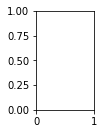

In [31]:
# 推論する画像の表示
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Test_images[i])
plt.show()

# 推論したラベルの表示
test_predictions = model.predict_generator(
    test_gen.flow(test_images[0:10], shuffle = False, batch_size=1),
    steps=10)
test_predictions = np.argmax(test_predictions, axis=1)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
        'dog', 'frog', 'horse', 'ship', 'truck']
print([labels[n] for n in test_predictions])

In [45]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(history, Test_images, Test_labels,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ValueError: ignored

In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict_prob=model.predict(Test_images)
predict_classes=np.argmax(predict_prob,axis=1)

#predict_classes = model.predict_classes(Test_images)
true_classes = Train_labels
#print(confusion_matrix(predict_prob, predict_classes))
print(predict_prob.shape)
print(Test_labels.shape)

(456, 5)
(456, 5)


In [76]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
 
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True)
    plt.show()
 

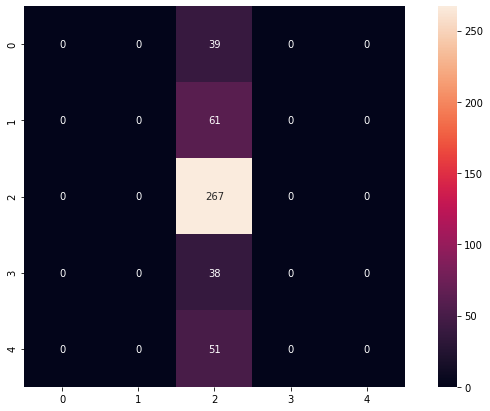

In [77]:
print_cmx(true_classes, predict_classes)